In [35]:
import pandas as pd 
df = pd.read_csv('bestsellers with categories.csv')
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Exploring the data ------
print(df.head())
# Get the shape of the spreadsheet 
print(df.shape)
# Get column names of the spreadsheet 
print(df.columns)
# Summary statistics for each column 
print(df.describe())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
(550, 7)
Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')
       User Rating       Reviews       Price         Year
count   550.000000    550.000000  

In [17]:
# Clean the data -----
df.drop_duplicates(inplace=True)

# Rename columns 
df.rename(columns={"Name": "Title", "Year": "Publication Year", "User Rating": "Rating"}, inplace=True)

# Convert the data type -> price 
df["Price"] = df["Price"].astype(float)

In [21]:
# Analysis 
## Analyzing author popularity 
author_counts = df['Author'].value_counts()
print(author_counts)


Author
Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: count, Length: 248, dtype: int64


C:\Users\ashle\AppData\Local\Temp\ipykernel_5400\3469248912.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\ashle\AppData\Local\Temp\ipykernel_5400\3469248912.py:11: UserWarning: The palette list has more values (30) than needed (15), which may not be intended.
  ax = sns.barplot(


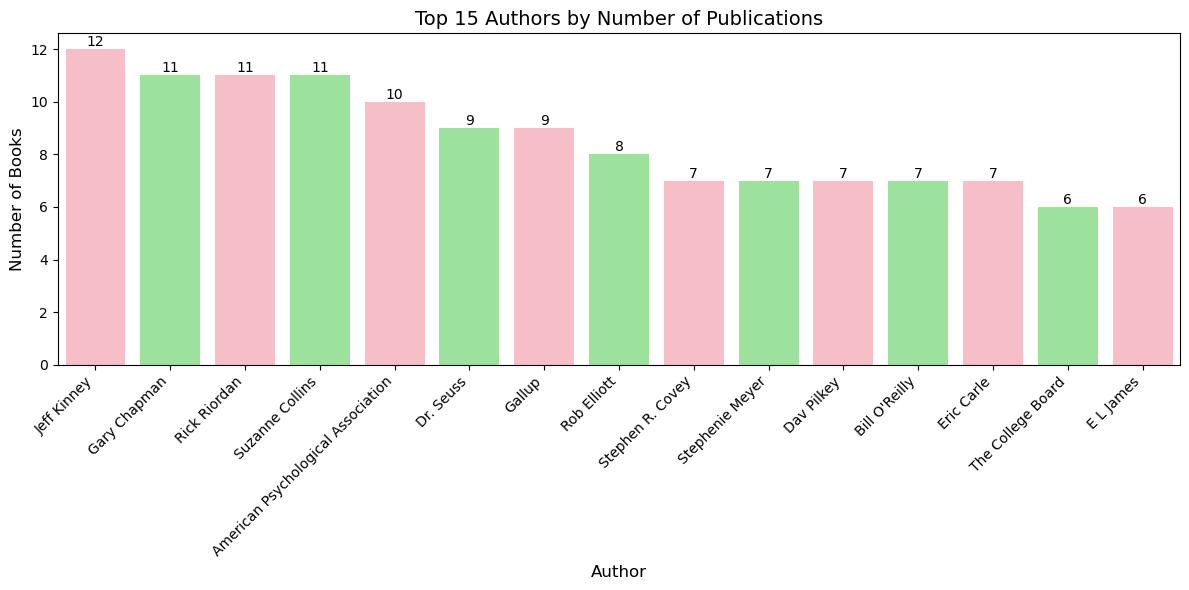

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
author_counts = df['Author'].value_counts().head(15)

# Define your custom colors
custom_colors = ['#FFB6C1', '#90EE90']  # Light pink and light green

# Create plot with alternating colors
ax = sns.barplot(
    x=author_counts.index,
    y=author_counts.values,
    palette=custom_colors * len(author_counts)  # Repeat the pattern
)

plt.title('Top 15 Authors by Number of Publications', fontsize=14)
plt.xlabel('Author', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0, 5), 
               textcoords='offset points')

plt.tight_layout()
plt.show()

In [23]:
## Averaging Rating by Genre 
avg_rating_by_genre = df.groupby("Genre")["Rating"].mean()
print(avg_rating_by_genre) 

Genre
Fiction        4.648333
Non Fiction    4.595161
Name: Rating, dtype: float64


In [25]:
# Export 
author_counts.head(10).to_csv("top_authors.csv")
avg_rating_by_genre.to_csv("avg_rating_by_genre.csv")